In [273]:
#%pip install scikit-learn
#%pip install matplotlib
#%pip install xgboost 
#%pip install seaborn 
#%pip install lightgbm
#%pip install tensorflow
#%pip install keras
#%pip install scikeras
#%pip install numpy

In [274]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import xgboost 
import lightgbm 
from scipy.stats import f_oneway
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress INFO messages
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

**Date Exploration, Preparation and Pre-processing**

In [276]:
df = pd.read_csv("hotel_booking.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [278]:
print('Shape before deleting duplicate values:', df.shape)

df = df.drop_duplicates()

print('Shape after deleting duplicate values:', df.shape)

Shape before deleting duplicate values: (119390, 36)
Shape after deleting duplicate values: (119390, 36)


In [279]:
# Goal attribute: is_canceled

df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [280]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [281]:
df.size

4298040

In [282]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [283]:
df.describe(include=['object'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [284]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [285]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [286]:
def combine_agent_company(agent, company):
    if pd.isna(agent) and pd.isna(company):
        return "no_agent_company"
    elif pd.isna(agent):
        return company  # Retorna apenas o valor de company se agent estiver ausente
    elif pd.isna(company):
        return agent  # Retorna apenas o valor de agent se company estiver ausente
    else:
        return f"{agent}_{company}"  # Concatena se ambos estiverem presentes

# Aplicar a função linha por linha
df['agent_company'] = df.apply(lambda row: combine_agent_company(row['agent'], row['company']), axis=1)

# Remover as colunas originais
df_cleaned = df.drop(columns=['agent', 'company'])

In [287]:
# Creating 'arrival_date' column from year, month, and day
df_cleaned['arrival_date'] = pd.to_datetime(df_cleaned['arrival_date_year'].astype(str) + '-' +
                                            df_cleaned['arrival_date_month'] + '-' +
                                            df_cleaned['arrival_date_day_of_month'].astype(str))

# Drop the original date columns
df_cleaned.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number'], inplace=True)

In [288]:
# Creating 'total_nights' column by summing weekend and week nights
df_cleaned['total_nights'] = df_cleaned['stays_in_weekend_nights'] + df_cleaned['stays_in_week_nights']

# Drop the original stay columns
df_cleaned.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'], inplace=True)

In [289]:
# Creating 'total_guests' column by summing adults, children, and babies
df_cleaned['total_guests'] = df_cleaned['adults'] + df_cleaned['children'] + df_cleaned['babies']

# Drop the original guest count columns
df_cleaned.drop(columns=['adults', 'children', 'babies'], inplace=True)

In [290]:
df_cleaned = df_cleaned.drop(columns=['name', 'email', 'phone-number', 'credit_card'], errors='ignore')

In [291]:
df_cleaned.columns

Index(['hotel', 'is_canceled', 'lead_time', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'agent_company',
       'arrival_date', 'total_nights', 'total_guests'],
      dtype='object')

In [292]:
df_cleaned.head()

,hotel,is_canceled,lead_time,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,agent_company,arrival_date,total_nights,total_guests
0,Resort Hotel,0,342,BB,PRT,Direct,Direct,0,0,0,...,Transient,0.0,0,0,Check-Out,2015-07-01,no_agent_company,2015-07-01,0,2.0
1,Resort Hotel,0,737,BB,PRT,Direct,Direct,0,0,0,...,Transient,0.0,0,0,Check-Out,2015-07-01,no_agent_company,2015-07-01,0,2.0
2,Resort Hotel,0,7,BB,GBR,Direct,Direct,0,0,0,...,Transient,75.0,0,0,Check-Out,2015-07-02,no_agent_company,2015-07-01,1,1.0
3,Resort Hotel,0,13,BB,GBR,Corporate,Corporate,0,0,0,...,Transient,75.0,0,0,Check-Out,2015-07-02,304.0,2015-07-01,1,1.0
4,Resort Hotel,0,14,BB,GBR,Online TA,TA/TO,0,0,0,...,Transient,98.0,0,1,Check-Out,2015-07-03,240.0,2015-07-01,2,2.0


In [293]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   meal                            119390 non-null  object        
 4   country                         118902 non-null  object        
 5   market_segment                  119390 non-null  object        
 6   distribution_channel            119390 non-null  object        
 7   is_repeated_guest               119390 non-null  int64         
 8   previous_cancellations          119390 non-null  int64         
 9   previous_bookings_not_canceled  119390 non-null  int64         
 10  reserved_room_type              119390 non-null  object 

In [294]:
missing_values = df_cleaned.isnull().sum()
missing_values
df_cleaned = df_cleaned.dropna(subset=['country'])

df_cleaned['total_guests'].fillna(df_cleaned['total_guests'].median(), inplace=True)


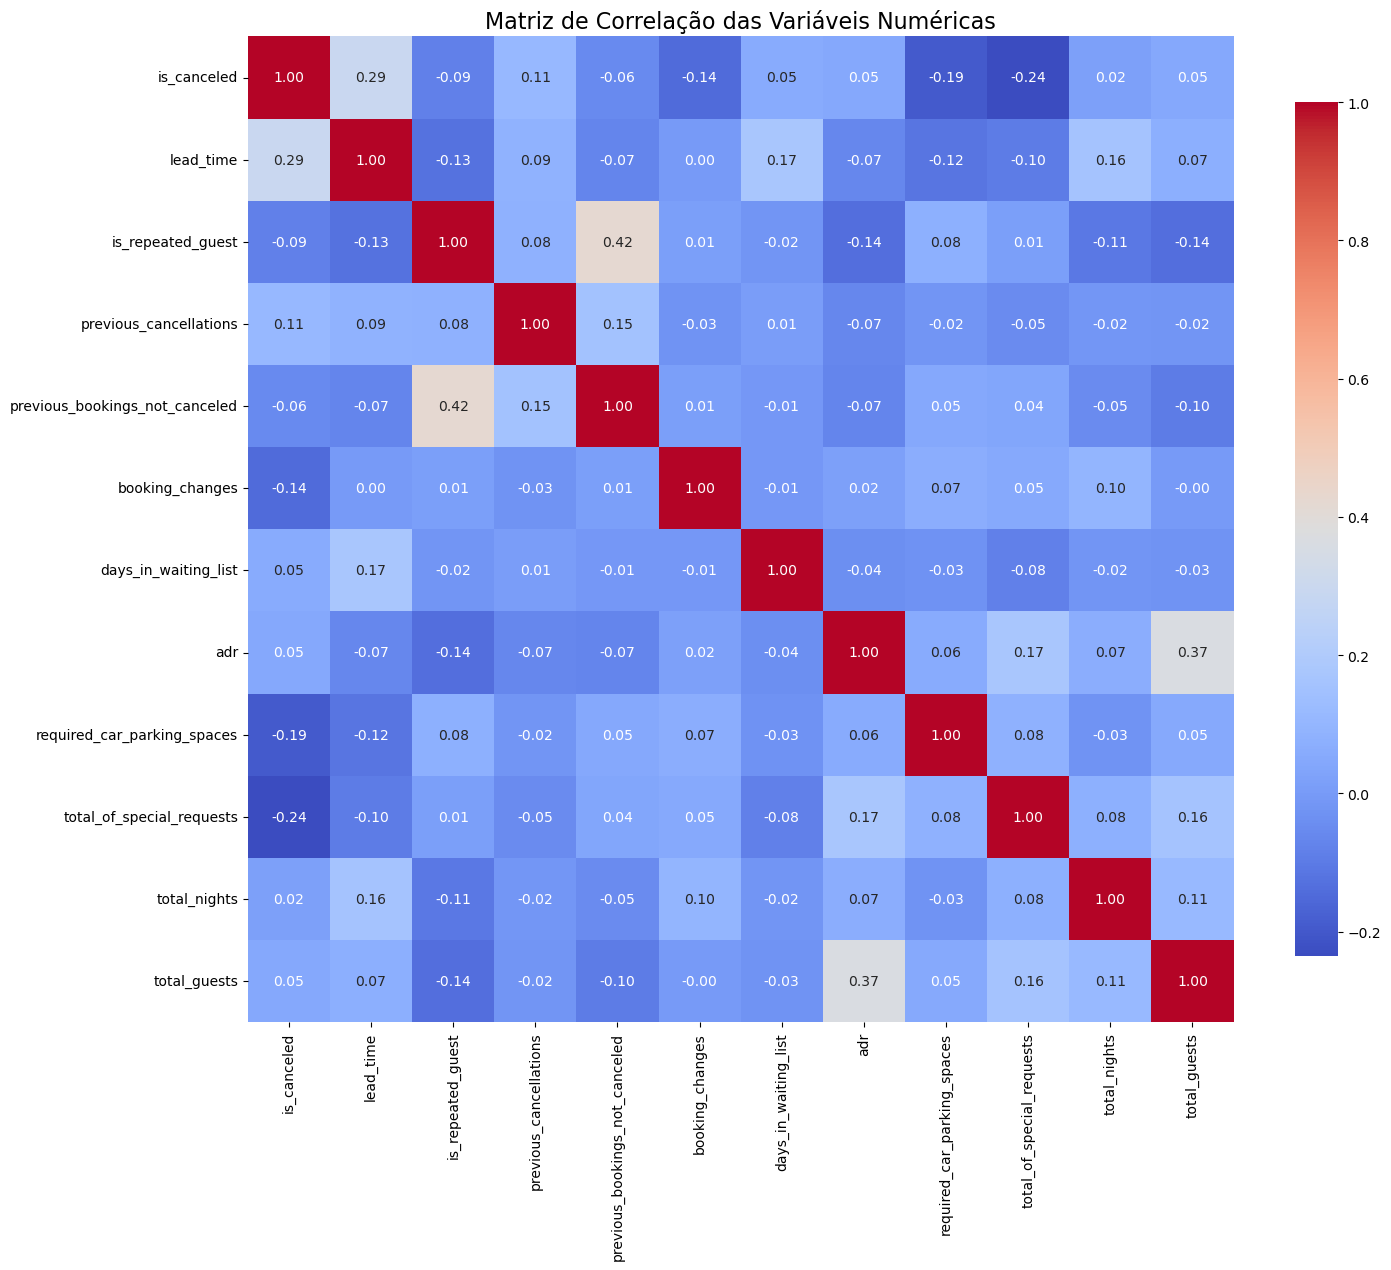

In [295]:
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

correlation_matrix = num_cols.corr()

plt.figure(figsize=(15, 13))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [296]:
datetime_cols = df_cleaned.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    df_cleaned[col + '_year'] = df_cleaned[col].dt.year
    df_cleaned[col + '_month'] = df_cleaned[col].dt.month
    df_cleaned[col + '_day'] = df_cleaned[col].dt.day
df_cleaned.drop(columns=datetime_cols, inplace=True)

# Identificar colunas categóricas
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
print("cat:\n", categorical_columns)

# Limitar o número de categorias
max_categories = 10
for col in categorical_columns:
    counts = df_cleaned[col].value_counts()
    top_categories = counts.nlargest(max_categories).index
    df_cleaned[col] = df_cleaned[col].where(df_cleaned[col].isin(top_categories), 'outro')

# *Convertendo colunas categóricas para strings*
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].astype(str)

# *Tratar valores nulos*
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna('')

# Inicializar o OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=True)

# Aplicar o OneHotEncoder nas colunas categóricas
encoded_features = encoder.fit_transform(df_cleaned[categorical_columns])

# Obter os nomes das colunas codificadas
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

# Criar um DataFrame a partir da matriz esparsa
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoded_feature_names, index=df_cleaned.index)

# Concatenar o DataFrame original (sem as colunas categóricas) com o DataFrame codificado
df_encoded = pd.concat([df_cleaned.drop(columns=categorical_columns), encoded_df], axis=1)

# Converter colunas booleanas para inteiros (se houver)
df_encoded = df_encoded.astype(int)

# Exibir dimensões do DataFrame final
print(f"Número total de colunas após a codificação: {df_encoded.shape[1]}")
print("Primeiras linhas do DataFrame codificado:\n", df_encoded.head())

cat:
 Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'agent_company'],
      dtype='object')
Número total de colunas após a codificação: 87
Primeiras linhas do DataFrame codificado:
    is_canceled  lead_time  is_repeated_guest  previous_cancellations  \
0            0        342                  0                       0   
1            0        737                  0                       0   
2            0          7                  0                       0   
3            0         13                  0                       0   
4            0         14                  0                       0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  adr  \
0                               0                3                     0    0   
1                               0            

In [297]:
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int32']).columns

numerical_cols = numerical_cols.drop('is_canceled', errors='ignore')

X = df_encoded.drop(columns=['is_canceled']) 
y = df_encoded['is_canceled']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


scaler = MinMaxScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])


X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


print(X_train[numerical_cols].head())

        lead_time  is_repeated_guest  previous_cancellations  \
56647    0.268657                0.0                     0.0   
38048    0.324288                0.0                     0.0   
11507    0.162822                0.0                     0.0   
104075   0.000000                0.0                     0.0   
52914    0.096336                0.0                     0.0   

        previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
56647                              0.0              0.0                   0.0   
38048                              0.0              0.0                   0.0   
11507                              0.0              0.0                   0.0   
104075                             0.0              0.0                   0.0   
52914                              0.0              0.0                   0.0   

             adr  required_car_parking_spaces  total_of_special_requests  \
56647   0.016667                        0.000       

In [298]:
X_numerical = X_train[numerical_cols]

# Calcular o primeiro (Q1) e terceiro quartis (Q3)
Q1 = X_numerical.quantile(0.25)
Q3 = X_numerical.quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Calcular os limites inferiores e superiores para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers_iqr = (X_numerical < lower_bound) | (X_numerical > upper_bound)

# Contar o número de outliers por coluna
outliers_iqr_count = outliers_iqr.sum()

# Criar o resumo de outliers
outlier_summary = pd.DataFrame({
    'Coluna': outliers_iqr_count.index,
    'Número de Outliers': outliers_iqr_count.values
})

# Exibir o resumo
outlier_summary

,Coluna,Número de Outliers
0,lead_time,2098
1,is_repeated_guest,2673
2,previous_cancellations,4459
3,previous_bookings_not_canceled,2384
4,booking_changes,12606
...,...,...
81,agent_company_6.0,2319
82,agent_company_7.0,2458
83,agent_company_9.0,0
84,agent_company_no_agent_company,6727


In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_encoded.select_dtypes(include=['float64', 'int32']), orient="h", palette="Set2")
plt.title('Boxplot das Variáveis Numéricas para Deteção de Outliers', fontsize=16)
plt.show()

In [ ]:
#is_canceled é target pq o objetivo é prever se a reserva vai ser cancelada
reg = LinearRegression()
reg.fit(X, y)

y_pred = reg.predict(X)

residuals = y - y_pred

residuals_outliers = np.abs(residuals) > (3 * np.std(residuals))

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

distances = kmeans.transform(X).min(axis=1)

cluster_outliers = distances > (3 * np.std(distances))

residuals_outliers_count = np.sum(residuals_outliers)
cluster_outliers_count = np.sum(cluster_outliers)

print("Outliers - Regressão:")
print(residuals_outliers_count)
print("Outliers - Clusters:")
print(cluster_outliers_count)

# Simulating the residuals and outliers for demonstration
np.random.seed(0)
residuals = np.random.normal(loc=0, scale=1, size=1000)
residuals_outliers = np.abs(residuals) > (3 * np.std(residuals))

# Simulating cluster data and outliers
X = np.random.rand(1000, 2)
kmeans_labels = np.random.choice([0, 1, 2], size=1000)
distances = np.random.rand(1000)
cluster_outliers = distances > (3 * np.std(distances))

# Gráfico 1: Histograma dos Residuais com Outliers
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, color='blue', label='Residuais', kde=True)
plt.axvline(3 * np.std(residuals), color='red', linestyle='--', label='Limite superior (3x std)')
plt.axvline(-3 * np.std(residuals), color='red', linestyle='--', label='Limite inferior (3x std)')
plt.title("Histograma dos Residuais com Limites de Outliers (Regressão)", fontsize=14)
plt.xlabel("Residuais", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico 2: Scatter Plot dos Clusters com Outliers
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', label='Clusters', s=50)
plt.scatter(X[cluster_outliers][:, 0], X[cluster_outliers][:, 1], color='red', label='Outliers (Clusters)', edgecolor='k', s=100)
plt.title("Scatter plot dos Clusters com Outliers", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
num_instancias_antes = X_numerical.shape[0]

print("Número de instâncias antes da remoção de outliers:", num_instancias_antes)
X_numerical_no_outliers = X_numerical[~((X_numerical < lower_bound) | (X_numerical > upper_bound)).any(axis=1)]

# Número de instâncias após a remoção de outliers
num_instancias_depois = X_numerical_no_outliers.shape[0]

# Verificar o número de instâncias restantes após a remoção de outliers
print("Número de instâncias após a remoção de outliers:", X_numerical_no_outliers.shape[0])

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_numerical_no_outliers, orient="h", palette="Set2")
plt.title('Boxplot das Variáveis Numéricas depois da Remoção de Outliers', fontsize=16)
plt.show()

In [ ]:
for col in numerical_cols:
    df_encoded[col + '_discr'] = pd.qcut(df_encoded[col], q=4, duplicates='drop')  # 4 equal-frequency bins

# Plot a boxplot for each discretized column if bins are valid
for col in numerical_cols:
    discr_column = col + '_discr'
    if discr_column in df_cleaned.columns and df_encoded[discr_column].nunique() > 1:  # Check if bins exist
        try:
            df_encoded.boxplot(column=col, by=discr_column)
            plt.title(f"{col} Equal-Frequency Discretization")
            plt.suptitle('')  # Removes the automatic subtitle
            plt.show()
        except ValueError as e:
            print(f"Could not plot {col} due to: {e}")

**Feature Selection**

1. Filter Methods

1.1 ANOVA

In [ ]:
continuous_columns = df_encoded.select_dtypes(include=['float64', 'int']).columns.tolist()

def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    SelectedPredictors = []
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists = inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        if AnovaResults[1] < 0.05:
            print(f"{predictor} is correlated with {TargetVariable} | P-Value: {AnovaResults[1]}")
            SelectedPredictors.append(predictor)
        else:
            print(f"{predictor} is NOT correlated with {TargetVariable} | P-Value: {AnovaResults[1]}")
    
    return SelectedPredictors

selected_predictors_anova = FunctionAnova(df_encoded, target_variable, continuous_columns)
print("Selected Predictors (ANOVA):", selected_predictors_anova)

1.2 Chi-Square

In [ ]:
categorical_columns = df_encoded.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    SelectedPredictors = []

    for predictor in CategoricalVariablesList:
        CrossTabResult = pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        if ChiSqResult[1] < 0.05:
            print(f"{predictor} is correlated with {TargetVariable} | P-Value: {ChiSqResult[1]}")
            SelectedPredictors.append(predictor)
        else:
            print(f"{predictor} is NOT correlated with {TargetVariable} | P-Value: {ChiSqResult[1]}")
    
    return SelectedPredictors

target_variable = 'is_canceled'

selected_predictors = FunctionChisq(df_encoded, target_variable, categorical_columns)
print("Selected Predictors:", selected_predictors)

2. Embedded Methods

2.1 LASSO Regularization

In [ ]:
def lasso_regularization(X_train, y_train):
    sel_ = SelectFromModel(LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))
    sel_.fit(X_train, y_train)

    selected_feat = X_train.columns[sel_.get_support()]
    removed_feats = X_train.columns[~sel_.get_support()]

    print("Número de características cujo coeficiente foi reduzido a zero:", len(removed_feats))
    print("Características removidas:", list(removed_feats))

    X_train_lasso = pd.DataFrame(sel_.transform(X_train), columns=selected_feat)
    
    return X_train_lasso, selected_feat

# Exemplo de uso com X_train e y_train já pré-processados
X_lasso, selected_features = lasso_regularization(X_train, y_train)
print("Selected features:", selected_features)

2.2 Random Forest Algorithm

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

2.3 PCA - Essa transformação ajuda a simplificar o modelo ao mesmo tempo em que preserva a maior parte da informação relevante, o que pode resultar num desempenho mais rápido e eficiente.

In [ ]:
pca = PCA(n_components=0.90)  # Mantendo 90% da variância

# Ajuste e transformação no conjunto de treino
X_train_pca = pca.fit_transform(X_train[numerical_cols])

# Transformação no conjunto de teste
X_test_pca = pca.transform(X_test[numerical_cols])

# Exibir a forma dos dados transformados
print("Forma dos dados após PCA - Treino:", X_train_pca.shape)
print("Forma dos dados após PCA - Teste:", X_test_pca.shape)

**Models**

1. K-nearest Neighbours

2. Decision Tree

3. Neural Networks

4. Naive Bayes

5. Support Vector Machines

**Combinação de modelos**